<a href="https://colab.research.google.com/github/RITABRITA-0407/Customer-segmentation/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: K-Means Clustering for Customer Segmentaon
Goal: Segment customers based on annual income and spending score using the K-Means
clustering algorithm.


In [1]:
# Import necessary libraries
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For visualization
from sklearn.cluster import KMeans # KMeans clustering algorithm
from sklearn.preprocessing import StandardScaler # For feature scaling

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df = pd.read_csv("Mall_Customers.csv") # Replace with your path

In [4]:
# Display the first few rows
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Step 3: Explore and Clean the Data

In [5]:
# Check column names
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
# Drop CustomerID as it’s not informative
df = df.drop('CustomerID', axis=1)

In [7]:
# Convert categorical Gender into numeric
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [8]:
# Basic data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None


Step 4: Select Features for Clustering

In [9]:
# Select relevant features for segmentation
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 5: Determine Opmal Number of Clusters (Elbow Method)

In [11]:
# Use Elbow Method to find optimal number of clusters
inertia = [] # Inertia = sum of squared distances to nearest cluster center

In [12]:
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, random_state=42)
 kmeans.fit(X_scaled)
 inertia.append(kmeans.inertia_)

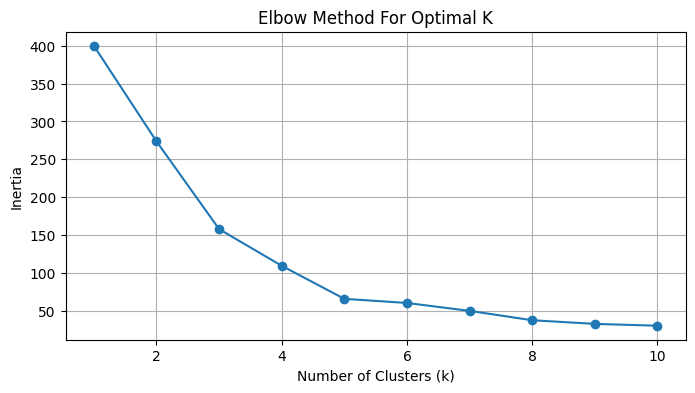

In [13]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Step 6: Apply K-Means Clustering

In [14]:
# Based on elbow curve, choose k=5 (for example)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [15]:
# View clustered data
print(df.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      0   19                  15                      39        4
1      0   21                  15                      81        2
2      1   20                  16                       6        4
3      1   23                  16                      77        2
4      1   31                  17                      40        4


Step 7: Visualize the Clusters

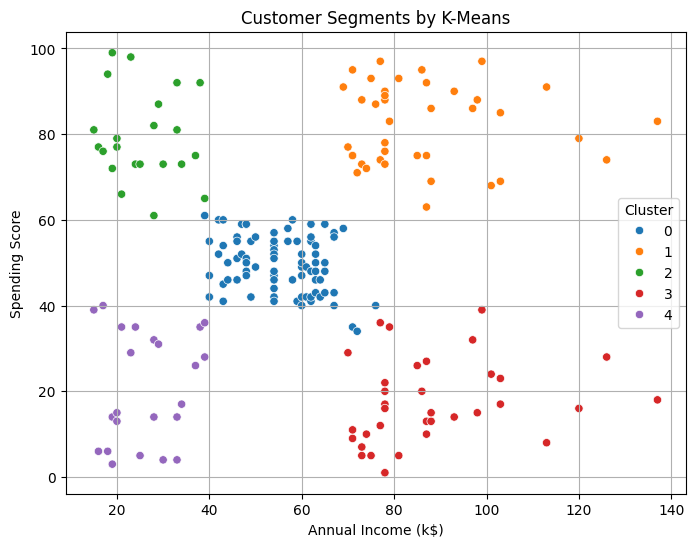

In [16]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
x=df['Annual Income (k$)'],
y=df['Spending Score (1-100)'],
hue=df['Cluster'],
palette='tab10'
)
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()